In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path


In [2]:
netflix = Path("Resources/netflix_data.csv")
hulu = Path("Resources/hulu_data.csv")
amazon = Path("Resources/amazon_data.csv")
disney=Path("Resources/disney_data.csv")

netflix_df =pd.read_csv(netflix)
hulu_df =pd.read_csv(hulu)
amazon_df =pd.read_csv(amazon)
disney_df =pd.read_csv(disney)

In [3]:
netflix_df['streaming_service'] = 'Netflix'
hulu_df['streaming_service'] = 'Hulu'
amazon_df['streaming_service'] = 'Amazon'
disney_df['streaming_service'] = 'Disney'


In [4]:
combined_df = pd.concat([netflix_df, hulu_df, amazon_df, disney_df], axis=0)

In [5]:
combined_df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,streaming_service,cast,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries,Netflix,NaN,NaN
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Netflix,NaN,NaN
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",Netflix,NaN,NaN
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies",Netflix,NaN,NaN
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",Netflix,NaN,NaN


In [6]:
print(combined_df)

     show_id     type                                           title  \
0         s1    Movie                            Dick Johnson Is Dead   
1         s3  TV Show                                       Ganglands   
2         s6  TV Show                                   Midnight Mass   
3        s14    Movie                Confessions of an Invisible Girl   
4         s8    Movie                                         Sankofa   
...      ...      ...                                             ...   
1445   s1446    Movie                        X-Men Origins: Wolverine   
1446   s1447    Movie  Night at the Museum: Battle of the Smithsonian   
1447   s1448    Movie                                 Eddie the Eagle   
1448   s1449    Movie                            Bend It Like Beckham   
1449   s1450    Movie           Captain Sparky vs. The Flying Saucers   

             director                                 country  \
0     Kirsten Johnson                           United Sta

In [7]:
Netflix_all_df = combined_df[(combined_df["streaming_service"] == "Netflix")]
Netflix_all_rating = Netflix_all_df["rating"].value_counts()
Netflix_all_rating

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

In [8]:
Hulu_all_df = combined_df[(combined_df["streaming_service"] == "Hulu")]
Hulu_all_rating = Hulu_all_df["rating"].value_counts()
Hulu_all_rating

rating
TV-14      691
TV-MA      391
R          345
TV-PG      321
PG-13      163
          ... 
157 min      1
28 min       1
64 min       1
5 min        1
6 min        1
Name: count, Length: 88, dtype: int64

In [9]:
Disney_all_df = combined_df[(combined_df["streaming_service"] == "Disney")]
Disney_all_rating = Disney_all_df["rating"].value_counts()
Disney_all_rating

rating
TV-G        318
TV-PG       301
G           253
PG          236
TV-Y7       131
TV-14        79
PG-13        66
TV-Y         50
TV-Y7-FV     13
Name: count, dtype: int64

In [10]:
Amazon_all_df = combined_df[(combined_df["streaming_service"] == "Amazon")]
Amazon_all_rating = Amazon_all_df["rating"].value_counts()
Amazon_all_rating

rating
13+         2117
16+         1547
ALL         1268
18+         1243
R           1010
PG-13        393
7+           385
PG           253
NR           223
TV-14        208
TV-PG        169
TV-NR        105
G             93
TV-G          81
TV-MA         77
TV-Y          74
TV-Y7         39
UNRATED       33
NC-17          3
AGES_18_       3
NOT_RATE       3
AGES_16_       2
16             1
ALL_AGES       1
Name: count, dtype: int64

In [11]:
All_rating_df = pd.DataFrame({
    "Netflix Ratings": Netflix_all_rating,
    "Hulu Ratings": Hulu_all_rating,
    "Amazon Ratings": Amazon_all_rating,
    "Disney Ratings": Disney_all_rating
})

All_rating_df

,Netflix Ratings,Hulu Ratings,Amazon Ratings,Disney Ratings
rating,,,,
1 Season,NaN,42.0,NaN,NaN
100 min,NaN,3.0,NaN,NaN
101 min,NaN,7.0,NaN,NaN
102 min,NaN,3.0,NaN,NaN
103 min,NaN,3.0,NaN,NaN
...,...,...,...,...
TV-Y,306.0,31.0,74.0,50.0
TV-Y7,333.0,46.0,39.0,131.0
TV-Y7-FV,6.0,NaN,NaN,13.0


In [12]:
All_rating_df['Rating Category'] = All_rating_df.index.to_series().apply( lambda x: 'Teens' if x in ['13+', 'PG-13', 'TV-14', '16+'] 
                                                                       else ('Kids' if x in ['PG', 'TV-PG', '7+', 'TV-Y7', 'TV-Y7-FV'] 
                                                                             else ('Adults' if x in ['R', 'NC-17', '18+', 'TV-MA', 'UR', 'UNRATED']
                                                                                    else ('All Ages' if x in ['G', 'TV-G', 'TV-Y', 'ALL', 'ALL AGES']
                                                                             else 'X') )))

substring = 'X'
filter = All_rating_df['Rating Category'].str.contains(substring)
All_rating_filtered_df = All_rating_df[~filter]

All_rating_filtered_df

,Netflix Ratings,Hulu Ratings,Amazon Ratings,Disney Ratings,Rating Category
rating,,,,,
13+,NaN,NaN,2117.0,NaN,Teens
16+,NaN,NaN,1547.0,NaN,Teens
18+,NaN,NaN,1243.0,NaN,Adults
7+,NaN,NaN,385.0,NaN,Kids
ALL,NaN,NaN,1268.0,NaN,All Ages
G,41.0,18.0,93.0,253.0,All Ages
NC-17,3.0,NaN,3.0,NaN,Adults
PG,287.0,105.0,253.0,236.0,Kids
PG-13,490.0,163.0,393.0,66.0,Teens


In [13]:
Adults_Rating_All = All_rating_filtered_df[(All_rating_filtered_df["Rating Category"] == "Adults")]
Adults_Rating_All

,Netflix Ratings,Hulu Ratings,Amazon Ratings,Disney Ratings,Rating Category
rating,,,,,
18+,NaN,NaN,1243.0,NaN,Adults
NC-17,3.0,NaN,3.0,NaN,Adults
R,799.0,345.0,1010.0,NaN,Adults
TV-MA,3205.0,391.0,77.0,NaN,Adults
UNRATED,NaN,NaN,33.0,NaN,Adults
UR,3.0,NaN,NaN,NaN,Adults


In [34]:
Adults_Rating_Netflix = Adults_Rating_All["Netflix Ratings"].sum()
Adults_Rating_Netflix

4010.0

In [15]:
Adults_Rating_Hulu = Adults_Rating_All["Hulu Ratings"].sum()
Adults_Rating_Hulu

736.0

In [16]:
Adults_Rating_Amazon = Adults_Rating_All["Amazon Ratings"].sum()
Adults_Rating_Amazon

2366.0

In [17]:
Adults_Rating_Disney = Adults_Rating_All["Disney Ratings"].sum()
Adults_Rating_Disney

0.0

In [18]:
Teens_Rating_All = All_rating_filtered_df[(All_rating_filtered_df["Rating Category"] == "Teens")]
Teens_Rating_All

,Netflix Ratings,Hulu Ratings,Amazon Ratings,Disney Ratings,Rating Category
rating,,,,,
13+,NaN,NaN,2117.0,NaN,Teens
16+,NaN,NaN,1547.0,NaN,Teens
PG-13,490.0,163.0,393.0,66.0,Teens
TV-14,2157.0,691.0,208.0,79.0,Teens


In [19]:
Teens_Rating_Netflix = Teens_Rating_All["Netflix Ratings"].sum()
Teens_Rating_Netflix

2647.0

In [20]:
Teens_Rating_Hulu = Teens_Rating_All["Hulu Ratings"].sum()
Teens_Rating_Hulu

854.0

In [21]:
Teens_Rating_Amazon = Teens_Rating_All["Amazon Ratings"].sum()
Teens_Rating_Amazon

4265.0

In [22]:
Teens_Rating_Disney = Teens_Rating_All["Disney Ratings"].sum()
Teens_Rating_Disney

145.0

In [23]:
Kids_Rating_All = All_rating_filtered_df[(All_rating_filtered_df["Rating Category"] == "Kids")]
Kids_Rating_All

,Netflix Ratings,Hulu Ratings,Amazon Ratings,Disney Ratings,Rating Category
rating,,,,,
7+,NaN,NaN,385.0,NaN,Kids
PG,287.0,105.0,253.0,236.0,Kids
TV-PG,861.0,321.0,169.0,301.0,Kids
TV-Y7,333.0,46.0,39.0,131.0,Kids
TV-Y7-FV,6.0,NaN,NaN,13.0,Kids


In [24]:
Kids_Rating_Netflix = Kids_Rating_All["Netflix Ratings"].sum()
Kids_Rating_Netflix

1487.0

In [25]:
Kids_Rating_Hulu = Kids_Rating_All["Hulu Ratings"].sum()
Kids_Rating_Hulu

472.0

In [26]:
Kids_Rating_Amazon = Kids_Rating_All["Amazon Ratings"].sum()
Kids_Rating_Amazon

846.0

In [44]:
Kids_Rating_Disney = Kids_Rating_All["Disney Ratings"].sum()
Kids_Rating_Disney

681.0

In [45]:
AllAges_Rating_All = All_rating_filtered_df[(All_rating_filtered_df["Rating Category"] == "All Ages")]
AllAges_Rating_All

,Netflix Ratings,Hulu Ratings,Amazon Ratings,Disney Ratings,Rating Category
rating,,,,,
ALL,NaN,NaN,1268.0,NaN,All Ages
G,41.0,18.0,93.0,253.0,All Ages
TV-G,220.0,148.0,81.0,318.0,All Ages
TV-Y,306.0,31.0,74.0,50.0,All Ages


In [46]:
AllAges_Rating_Netflix = AllAges_Rating_All["Netflix Ratings"].sum()
AllAges_Rating_Netflix

567.0

In [47]:
AllAges_Rating_Hulu = AllAges_Rating_All["Hulu Ratings"].sum()
AllAges_Rating_Hulu

197.0

In [48]:
AllAges_Rating_Amazon = AllAges_Rating_All["Amazon Ratings"].sum()
AllAges_Rating_Amazon

1516.0

In [49]:
AllAges_Rating_Disney = AllAges_Rating_All["Disney Ratings"].sum()
AllAges_Rating_Disney

621.0

In [50]:
AllAges_Rating_All_Df = pd.DataFrame (
    {"Netflix Ratings": [AllAges_Rating_Netflix],
     "Hulu Ratings": [AllAges_Rating_Hulu],
     "Amazon Ratings": [AllAges_Rating_Amazon],
     "Disney Ratings": [AllAges_Rating_Disney],
})

AllAges_Rating_All_Df

,Netflix Ratings,Hulu Ratings,Amazon Ratings,Disney Ratings
0,567.0,197.0,1516.0,621.0


In [51]:
Kids_Rating_All_Df = pd.DataFrame (
    {"Netflix Ratings": [Kids_Rating_Netflix],
     "Hulu Ratings": [Kids_Rating_Hulu],
     "Amazon Ratings": [Kids_Rating_Amazon],
     "Disney Ratings": [Kids_Rating_Disney],
})

Kids_Rating_All_Df

,Netflix Ratings,Hulu Ratings,Amazon Ratings,Disney Ratings
0,1487.0,472.0,846.0,681.0


In [52]:
Teens_Rating_All_Df = pd.DataFrame (
    {"Netflix Ratings": [Teens_Rating_Netflix],
     "Hulu Ratings": [Teens_Rating_Hulu],
     "Amazon Ratings": [Teens_Rating_Amazon],
     "Disney Ratings": [Teens_Rating_Disney],
})

Teens_Rating_All_Df

,Netflix Ratings,Hulu Ratings,Amazon Ratings,Disney Ratings
0,2647.0,854.0,4265.0,145.0


In [41]:
Adults_Rating_All_Df = pd.DataFrame (
    {"Netflix Ratings": [Adults_Rating_Netflix],
     "Hulu Ratings": [Adults_Rating_Hulu],
     "Amazon Ratings": [Adults_Rating_Amazon],
     "Disney Ratings": [Adults_Rating_Disney],
})

Adults_Rating_All_Df

,Netflix Ratings,Hulu Ratings,Amazon Ratings,Disney Ratings
0,4010.0,736.0,2366.0,0.0


In [88]:
All_Ratings_Complete_Df = pd.DataFrame (
    {"Netflix": [AllAges_Rating_Netflix, Kids_Rating_Netflix, Teens_Rating_Netflix, Adults_Rating_Netflix],
     "Hulu": [AllAges_Rating_Hulu, Kids_Rating_Hulu, Teens_Rating_Hulu, Adults_Rating_Hulu],
     "Amazon": [AllAges_Rating_Amazon, Kids_Rating_Amazon, Teens_Rating_Amazon, Adults_Rating_Amazon],
     "Disney": [AllAges_Rating_Disney, Kids_Rating_Disney, Teens_Rating_Disney, Adults_Rating_Disney]},
index=["All Ages", "Kids", "Teens", "Adults"])

All_Ratings_Complete_Df

,Netflix,Hulu,Amazon,Disney
All Ages,567.0,197.0,1516.0,621.0
Kids,1487.0,472.0,846.0,681.0
Teens,2647.0,854.0,4265.0,145.0
Adults,4010.0,736.0,2366.0,0.0


<Axes: >

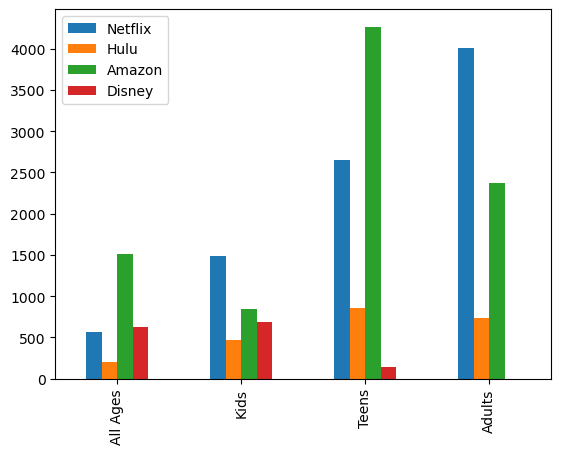

In [90]:
All_Ratings_Bar = pd.DataFrame (
    {"Netflix": [AllAges_Rating_Netflix, Kids_Rating_Netflix, Teens_Rating_Netflix, Adults_Rating_Netflix],
     "Hulu": [AllAges_Rating_Hulu, Kids_Rating_Hulu, Teens_Rating_Hulu, Adults_Rating_Hulu],
     "Amazon": [AllAges_Rating_Amazon, Kids_Rating_Amazon, Teens_Rating_Amazon, Adults_Rating_Amazon],
     "Disney": [AllAges_Rating_Disney, Kids_Rating_Disney, Teens_Rating_Disney, Adults_Rating_Disney]},
index=["All Ages", "Kids", "Teens", "Adults"])

All_Ratings_Bar.plot(kind="bar")